In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='clahe_kermany.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('clahe_kermany.zip')
f.keys()
!unzip "clahe_kermany"

Streaming output truncated to the last 5000 lines.
  inflating: clahe_kermany/train/NORMAL/NORMAL-8050269-6_aug_0.jpg  
  inflating: clahe_kermany/train/NORMAL/NORMAL-8050269-7_aug_0.jpg  
  inflating: clahe_kermany/train/NORMAL/NORMAL-8050269-8_aug_0.jpg  
  inflating: clahe_kermany/train/NORMAL/NORMAL-8050636-1_aug_0.jpg  
  inflating: clahe_kermany/train/NORMAL/NORMAL-8050636-2_aug_0.jpg  
  inflating: clahe_kermany/train/NORMAL/NORMAL-8055145-1_aug_0.jpg  
  inflating: clahe_kermany/train/NORMAL/NORMAL-8055145-2_aug_0.jpg  
  inflating: clahe_kermany/train/NORMAL/NORMAL-8055145-3_aug_0.jpg  
  inflating: clahe_kermany/train/NORMAL/NORMAL-8055590-1_aug_0.jpg  
  inflating: clahe_kermany/train/NORMAL/NORMAL-8055590-2_aug_0.jpg  
  inflating: clahe_kermany/train/NORMAL/NORMAL-8055590-3_aug_0.jpg  
  inflating: clahe_kermany/train/NORMAL/NORMAL-8056259-1_aug_0.jpg  
  inflating: clahe_kermany/train/NORMAL/NORMAL-8056259-2_aug_0.jpg  
  inflating: clahe_kermany/train/NORMAL/NORMAL-80562

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras

import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.15.0


In [ ]:
import tensorflow as tf

# Define the batch size and image size
BATCH_SIZE = 32
IMG_SIZE = (224, 224)  # Change this to your desired image size

# Directory where your dataset is located (replace with your actual path)
dataset_directory = '/content/clahe_kermany/train'
test_dataset = '/content/clahe_kermany/test'


# Create a training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=0.2,  # Specify the validation split here
    subset="training",
    seed = 66 # This creates the training dataset
)

# Create a validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=0.2,  # Specify the validation split here
    subset="validation" ,
    seed= 66 # This creates the validation dataset
)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_dataset,
                                                                 shuffle=True,
                                                               batch_size=BATCH_SIZE,
                                                               image_size=IMG_SIZE)


Found 83484 files belonging to 4 classes.
Using 66788 files for training.
Found 83484 files belonging to 4 classes.
Using 16696 files for validation.
Found 968 files belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomZoom(height_factor=0.2)

    ],
    name="img_augmentation",
)

Found 83484 files belonging to 4 classes.


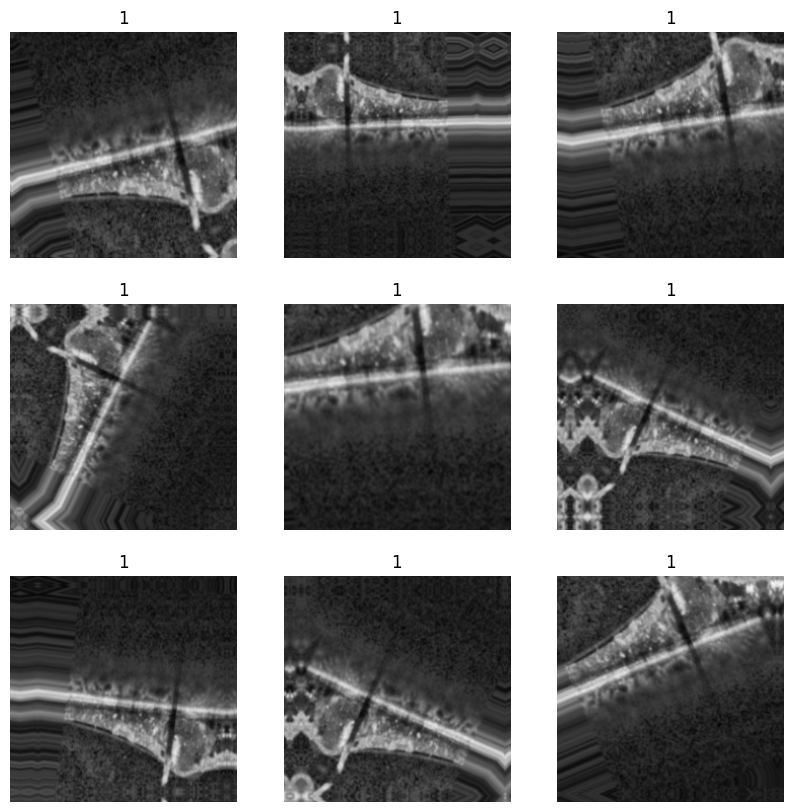

In [ ]:
import numpy as np

dataset = tf. keras.preprocessing. image_dataset_from_directory(
'/content/clahe_kermany/train',
shuffle=True,
image_size = (224, 224) ,
batch_size=32
)

for images, labels in dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = img_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

In [ ]:
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense

def identity_block(X, f):
    X_skip = X

    # First convolutional layer
    X = Conv2D(f, (3, 3), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    # Second convolutional layer
    X = Conv2D(f, (3, 3), padding='same')(X)
    X = BatchNormalization()(X)

    # Add the skip connection
    X = Add()([X, X_skip])
    X = Activation('relu')(X)

    return X

def convolutional_block(X, f):
    X_skip = X

    # First convolutional layer with strides=2 for downsampling
    X = Conv2D(f, (3, 3), strides=(2, 2), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    # Second convolutional layer
    X = Conv2D(f, (3, 3), padding='same')(X)
    X = BatchNormalization()(X)

    # 1x1 convolutional layer for skip connection
    X_skip = Conv2D(f, (1, 1), strides=(2, 2))(X_skip)

    # Add the skip connection
    X = Add()([X, X_skip])
    X = Activation('relu')(X)

    return X

# Define your input tensor
input_shape = (224, 224, 3)  # Input size is (224, 224, 3)

X_input = Input(input_shape)

# Initial Convolutional Layer
X = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(X_input)
X = BatchNormalization()(X)
X = Activation('relu')(X)

# Max Pooling
X = MaxPooling2D((3, 3), strides=(2, 2))(X)

# Stack residual blocks
X = convolutional_block(X, 64)
X = identity_block(X, 64)
X = identity_block(X, 64)
X = convolutional_block(X, 128)
X = identity_block(X, 128)
X = identity_block(X, 128)

# Global Average Pooling
X = GlobalAveragePooling2D()(X)

# Fully Connected Layer for Classification
X = Dense(4, activation='softmax')(X)  # Adjust the number of output units based on your classification task

# Create the Keras model
model = keras.models.Model(inputs=X_input, outputs=X)

# Compile the model and specify your loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 112, 112, 64)         0         ['batch_normalization[0][0

In [ ]:
epochs = 100
history = model.fit(train_dataset, epochs=epochs, validation_data=validation_dataset)

Epoch 1/100
2088/2088 [==============================] - 139s 61ms/step - loss: 0.4508 - accuracy: 0.8413 - val_loss: 0.9836 - val_accuracy: 0.6444
Epoch 2/100
2088/2088 [==============================] - 124s 59ms/step - loss: 0.2772 - accuracy: 0.9059 - val_loss: 0.2956 - val_accuracy: 0.9026
Epoch 3/100
2088/2088 [==============================] - 123s 59ms/step - loss: 0.2331 - accuracy: 0.9202 - val_loss: 0.2415 - val_accuracy: 0.9177
Epoch 4/100
2088/2088 [==============================] - 123s 59ms/step - loss: 0.2033 - accuracy: 0.9300 - val_loss: 0.2571 - val_accuracy: 0.9079
Epoch 5/100
2088/2088 [==============================] - 124s 59ms/step - loss: 0.1813 - accuracy: 0.9375 - val_loss: 0.3312 - val_accuracy: 0.8846
Epoch 6/100
2088/2088 [==============================] - 124s 59ms/step - loss: 0.1660 - accuracy: 0.9437 - val_loss: 0.2120 - val_accuracy: 0.9314
Epoch 7/100
2088/2088 [==============================] - 123s 59ms/step - loss: 0.1494 - accuracy: 0.9495 - val_

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


31/31 [==============================] - 2s 36ms/step - loss: 0.2781 - accuracy: 0.9618
Test Loss: 0.2781
Test Accuracy: 0.9618


In [ ]:

dataset = '/content/clahe_kermany/train'

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

validation_dataset = tf.keras.utils.image_dataset_from_directory(dataset,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE,
                                                                 validation_split=.10,
                                                                 subset='validation',
                                                                 seed=66)

Found 83484 files belonging to 4 classes.
Using 8348 files for validation.


In [ ]:
class_names = validation_dataset.class_names
class_names

['CNV', 'DME', 'DRUSEN', 'NORMAL']

first image to predict
actual label: NORMAL
1/1 [==============================] - 0s 30ms/step
predicted label: NORMAL


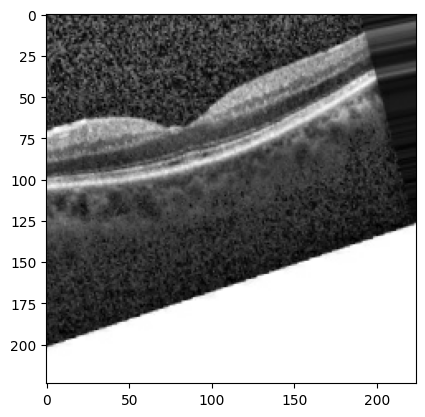

In [ ]:
import numpy as np
for images_batch, labels_batch in validation_dataset.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 24ms/step


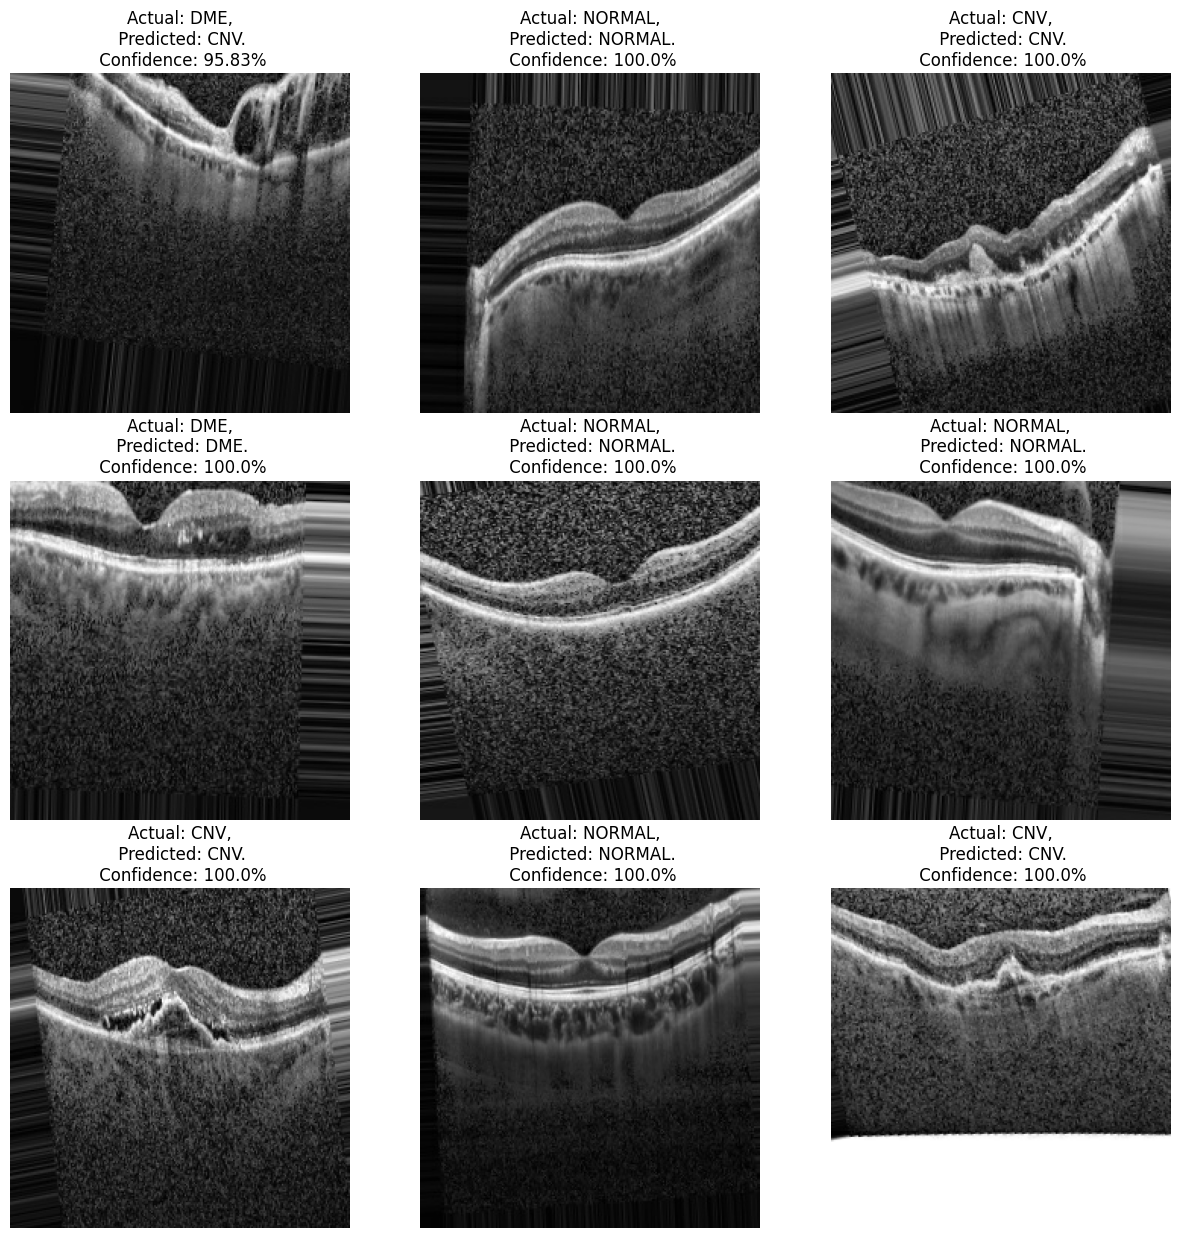

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in validation_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 27ms/step
F1 Score: 0.9069434790542532
Precision: 0.9239581045923028
Recall: 0.8932411654811612
ROC-AUC Score: 0.9839432011878594


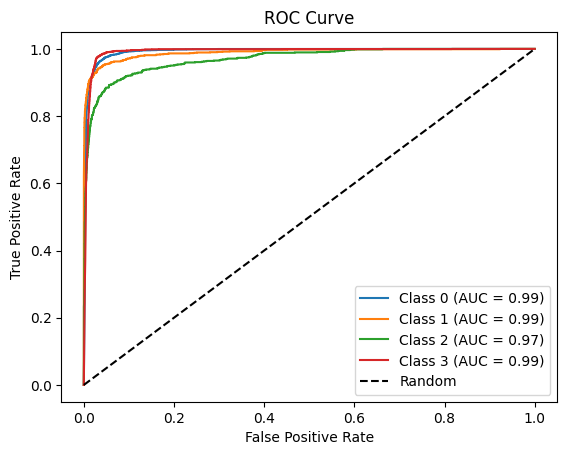

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
nb_classes = 4

# After model.fit(...)
validation_dataset = validation_dataset.unbatch().batch(1)  # Batch size = 1 for individual predictions

y_true = []
y_pred = []

for x_val, y_val in validation_dataset:
    y_true.append(y_val.numpy()[0])  # Append true labels
    y_pred.append(model.predict(x_val)[0])  # Append predicted probabilities (raw output)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the metrics
f1 = f1_score(y_true, y_pred_classes, average='macro')
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
roc_auc = roc_auc_score(y_true, y_pred, multi_class='ovo')

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC Score: {roc_auc}")

# Plot ROC curves (only for binary classification or when using one-hot encoded labels)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nb_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(nb_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

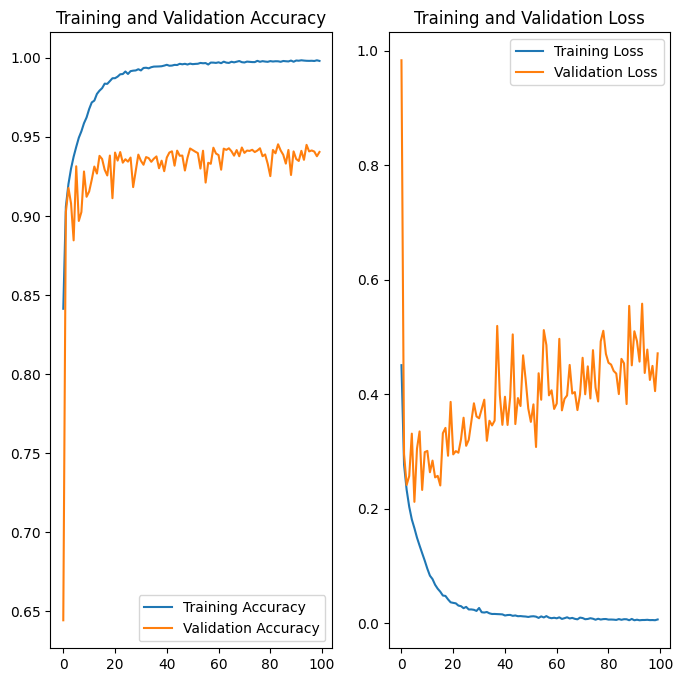

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace 'Class 0' and 'Class 1' with the actual class names from your dataset
# class_names = test_dataset.class_names

# Create empty arrays to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset to obtain true and predicted labels
for images, labels in validation_dataset:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap using seaborn with orange colormap
plt.figure(figsize=(12, 10))

# Create a rectangular border around class labels
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='d', xticklabels=['\n' + cls + '\n' for cls in class_names],
            yticklabels=['\n' + cls + '\n' for cls in class_names], cbar=False, linewidths=1, linecolor='black')

# Add a title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adjust the layout to maintain 1cm distance from the matrix
plt.tight_layout(rect=[0, 0, 1, 1])

# Show the plot
plt.show()


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 26ms/step
